# Elliptic Equations

The two most famous elliptic equations, which ou have encountered through your student career (I am sure) are the Poisson equation and the Laplace equation, the first one being a particular case of the second one.

The Laplace equation is formulated as:

$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0
$$


$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = f(x,y)
$$

The Laplace equation is in 2D and thus can be written in a finite difference format using the "5 points formula" as follows:

$$
\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{(\Delta y)^2} = 0
$$

To solve this iteration, there are different methods, and none is as straight-forward as the one that we saw earlier for the parabolic and the hyperbolic equations.

There are however "simple" methods, like the Gauss-Seidel method:

$$
u^{k+1}_{i,j}= \frac{1}{2(1 + \beta ^2)} [u^k _{i+1,j} + u^{k+1} _{i,j-1} \beta ^2 (u^k _{i,j+1} + u ^{k+1} _{i,j-1})]
$$

... and you can see that this time we are not only working on the present time-step, but we also need to work on the next time-step (which we are trying to calculate), so that we need to work almost in a "trial and error" until the solutions converge.

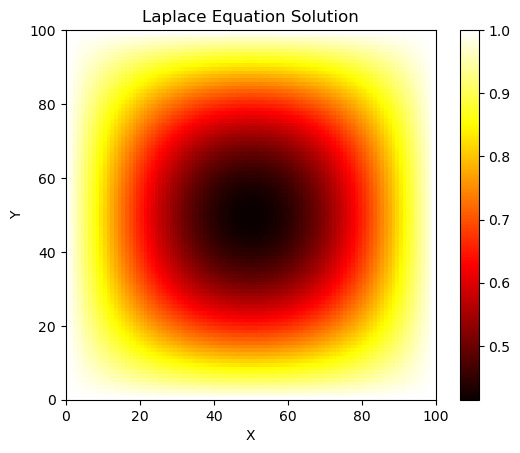

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def solve_laplace_equation(n, max_iterations, tolerance):
    # Create the initial grid with zeros
    grid = np.zeros((n, n))

    # Set the boundary conditions
    grid[0, :] = 1  # Top boundary
    grid[-1, :] = 1  # Bottom boundary
    grid[:, 0] = 1  # Left boundary
    grid[:, -1] = 1  # Right boundary

    # Perform Gauss-Seidel iterations
    for iteration in range(max_iterations):
        prev_grid = np.copy(grid)
        max_diff = 0.0

        # Update the interior points using neighboring values
        for i in range(1, n - 1):
            for j in range(1, n - 1):
                grid[i, j] = 0.25 * (grid[i-1, j] + prev_grid[i+1, j] + 1*(grid[i, j-1] + prev_grid[i, j+1]))

                # Calculate the maximum difference for convergence check
                diff = abs(grid[i, j] - prev_grid[i, j])
                if diff > max_diff:
                    max_diff = diff

        # Check for convergence
        if max_diff < tolerance:
            break

    return grid


# Set the parameters
n = 100  # Grid size
max_iterations = 1000  # Maximum number of iterations
tolerance = 1e-6  # Convergence tolerance

# Solve the Laplace equation
solution = solve_laplace_equation(n, max_iterations, tolerance)

# Plot the solution
plt.imshow(solution, cmap='hot', origin='lower', extent=[0, n, 0, n])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Laplace Equation Solution')
plt.show()


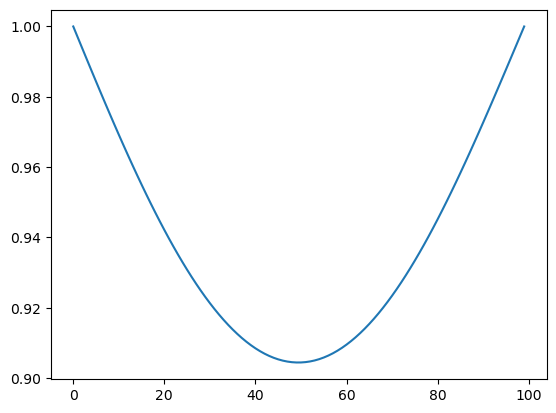

In [12]:
plt.plot(solution[5,:])

### The Poisson Equation

For the Poisson equation, the only difference is that there is a source term on the right-hand side. when we solve the equation, we thus need to add either a function or a value. In the present example we are using a source value of 0.5

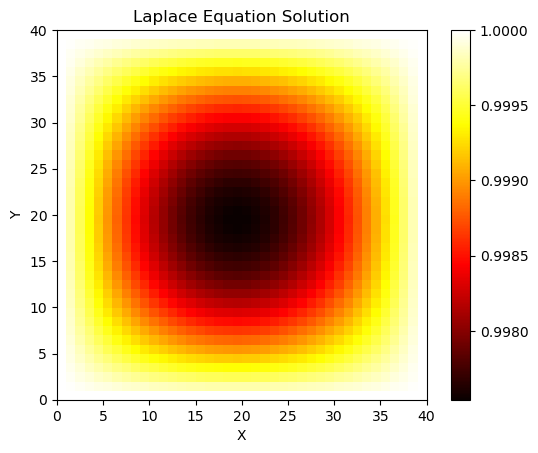

In [10]:
import numpy as np

def solve_poisson_equation(n, max_iterations, tolerance, source):
    # Create the initial grid with zeros
    grid = np.zeros((n, n))

    # Set the boundary conditions
    grid[0, :] = 1  # Top boundary
    grid[-1, :] = 1  # Bottom boundary
    grid[:, 0] = 1  # Left boundary
    grid[:, -1] = 1  # Right boundary

    # Perform Gauss-Seidel iterations
    for iteration in range(max_iterations):
        prev_grid = np.copy(grid)
        max_diff = 0.0

        # Update the interior points using neighboring values and the source term
        for i in range(1, n - 1):
            for j in range(1, n - 1):
                grid[i, j] = 0.25 * (grid[i-1, j] + prev_grid[i+1, j] + grid[i, j-1] + prev_grid[i, j+1] - source)

                # Calculate the maximum difference for convergence check
                diff = abs(grid[i, j] - prev_grid[i, j])
                if diff > max_diff:
                    max_diff = diff

        # Check for convergence
        if max_diff < tolerance:
            break

    return grid

# Set the parameters
n = 40  # Grid size
max_iterations = 1000  # Maximum number of iterations
tolerance = 1e-6  # Convergence tolerance

# Solve the Laplace equation
solution = solve_laplace_equation(n, max_iterations, tolerance)

# Plot the solution
plt.imshow(solution, cmap='hot', origin='lower', extent=[0, n, 0, n])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Laplace Equation Solution')
plt.show()

There are many other ways to calculate those equations, but my goal is not to do a class in mathematics, what I wanted you to know was to be able to calculate numerically the three main types of mathematical partial differential equations:

(1) the parabolic equation (diffusion)
(2) the hyperbolic equation (wave)
(3) the elliptic equation (Laplace, Poisson)

Notable Reference:

Poisson (1823). "Mémoire sur la théorie du magnétisme en mouvement" [Memoir on the theory of magnetism in motion]. Mémoires de l'Académie Royale des Sciences de l'Institut de France (in French). 6: 441–570. 

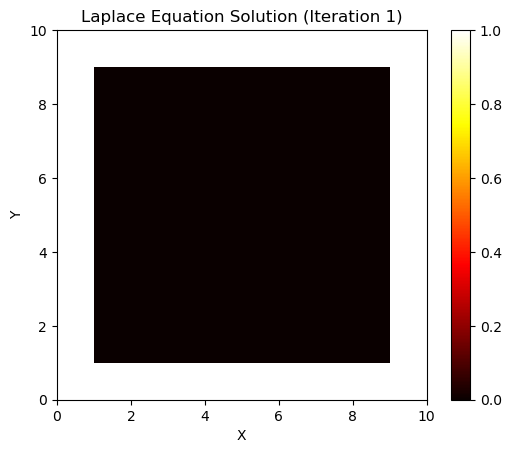

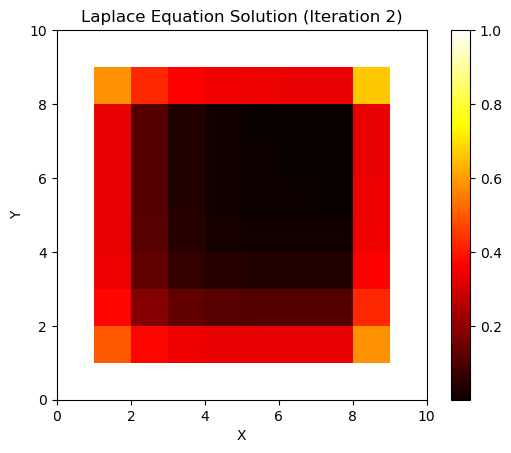

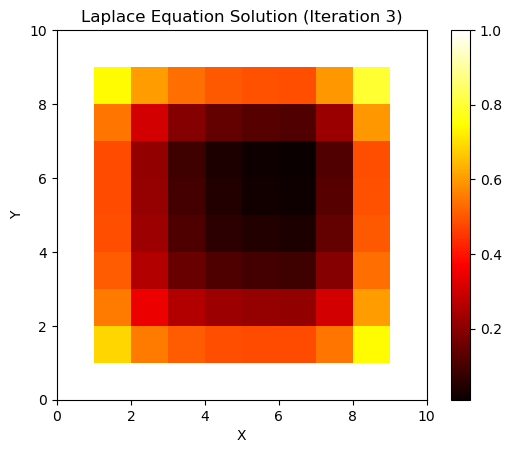

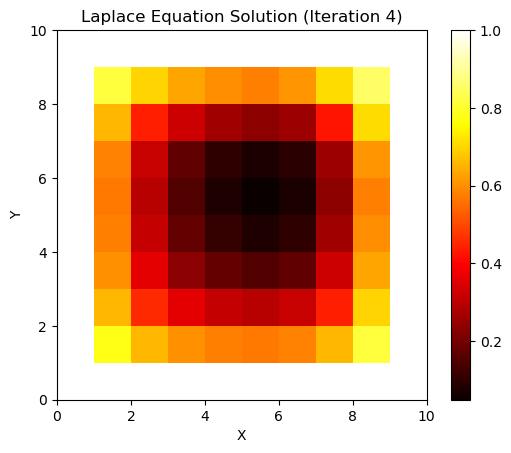

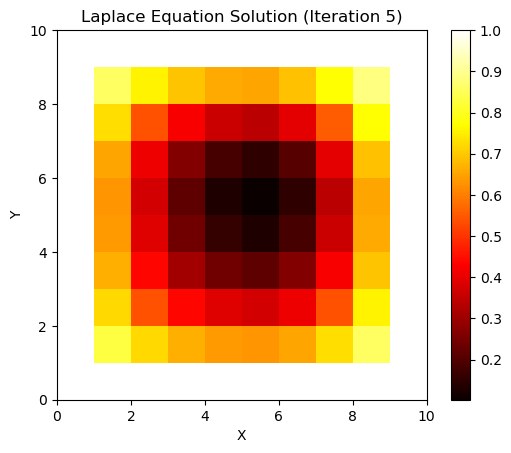

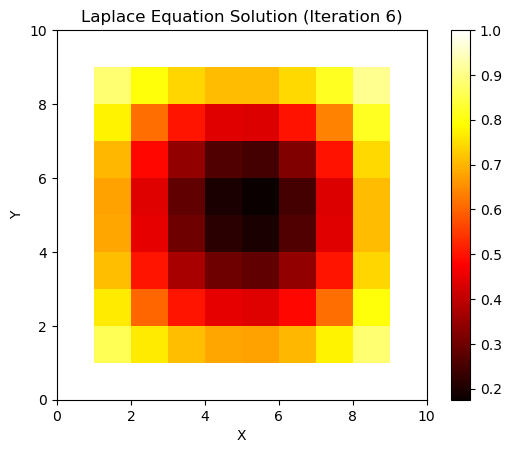

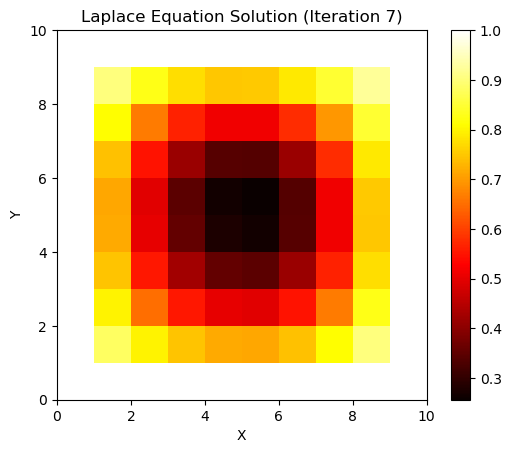

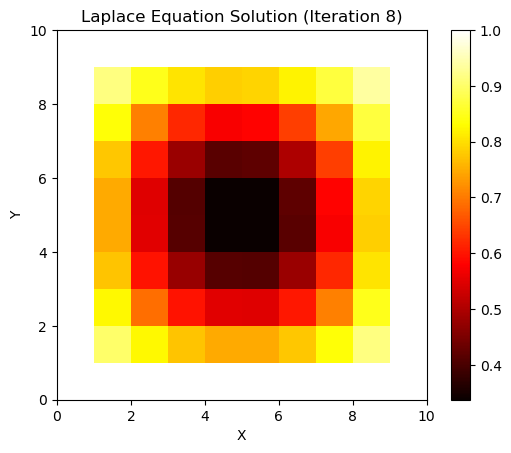

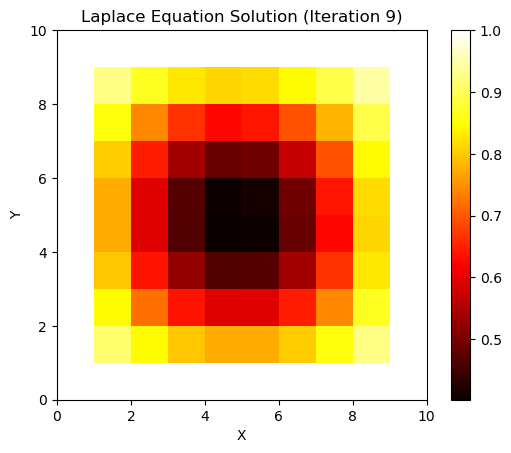

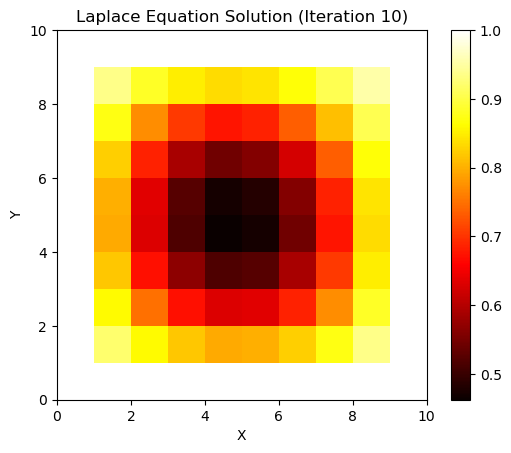

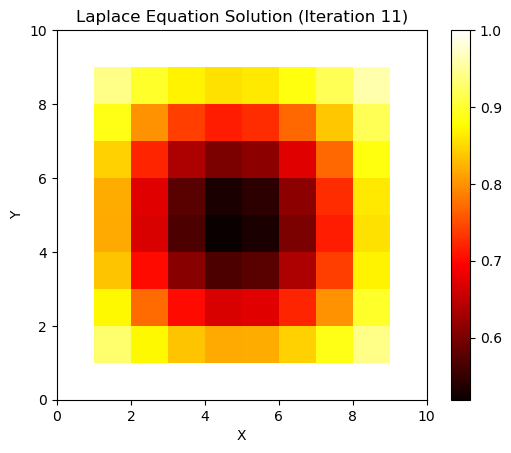

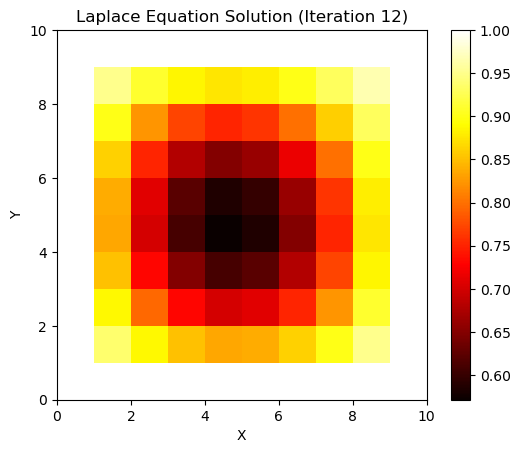

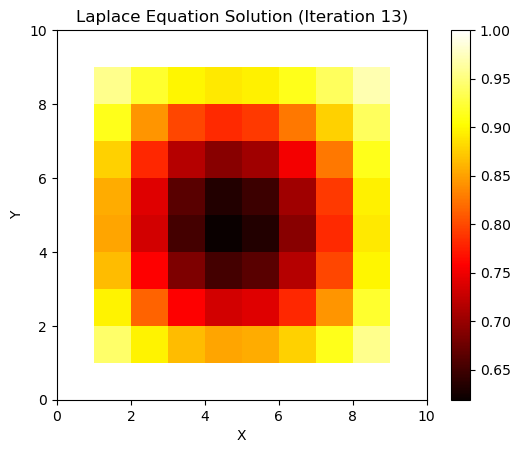

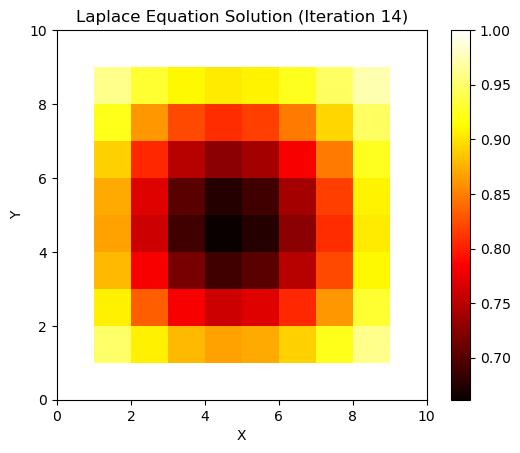

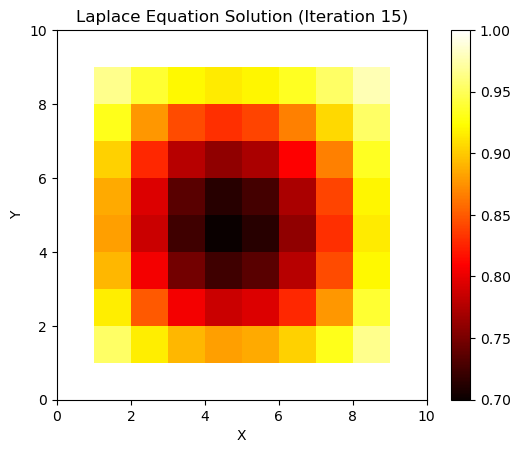

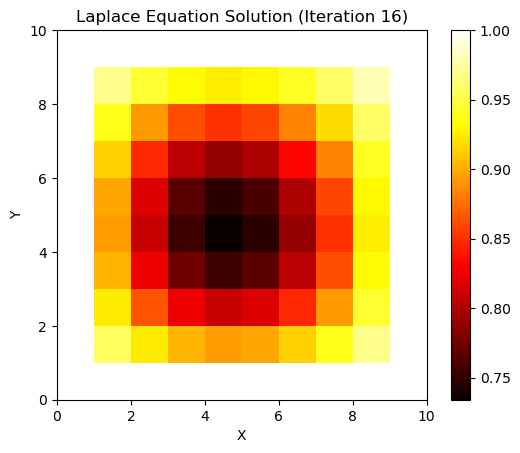

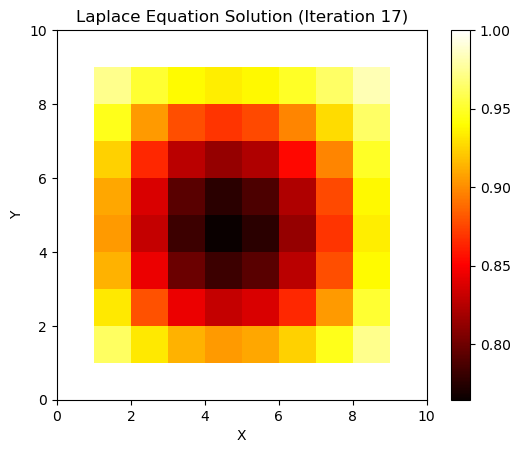

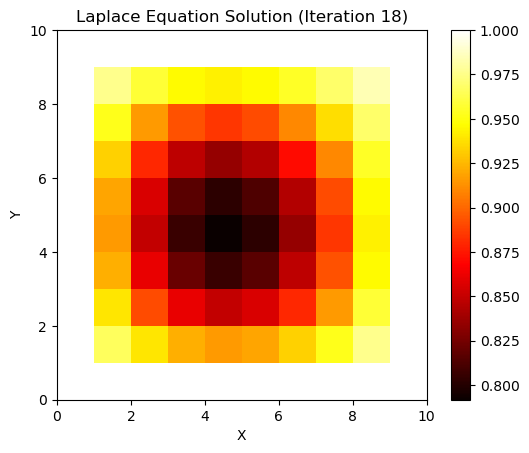

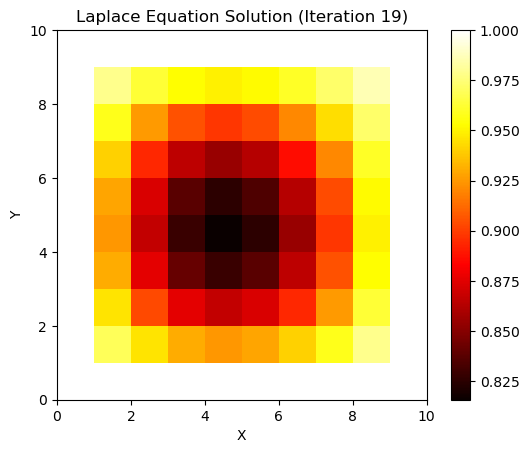

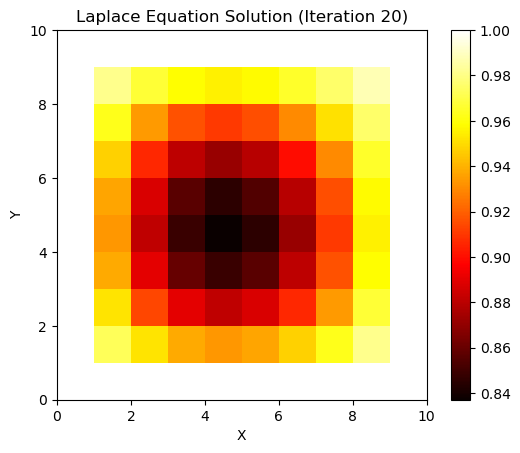

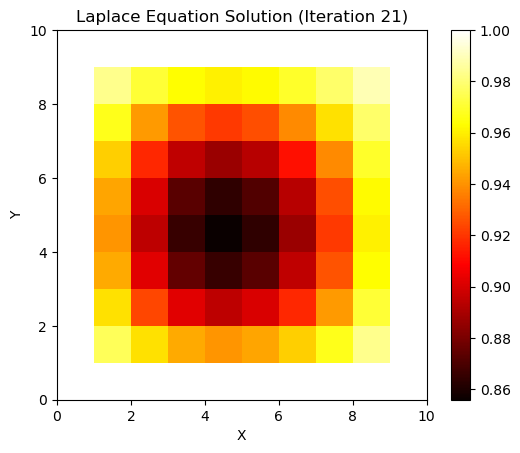

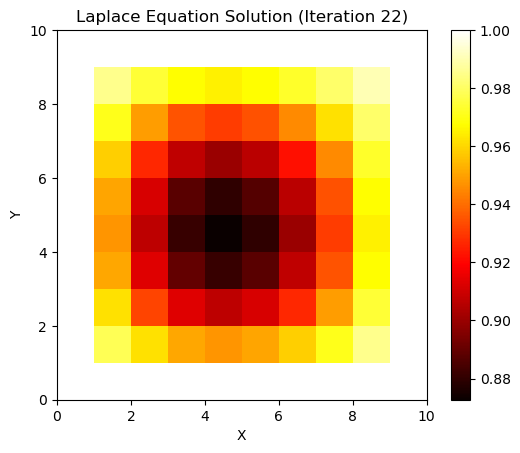

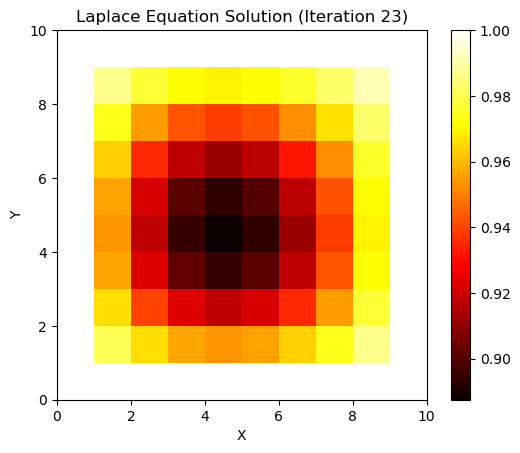

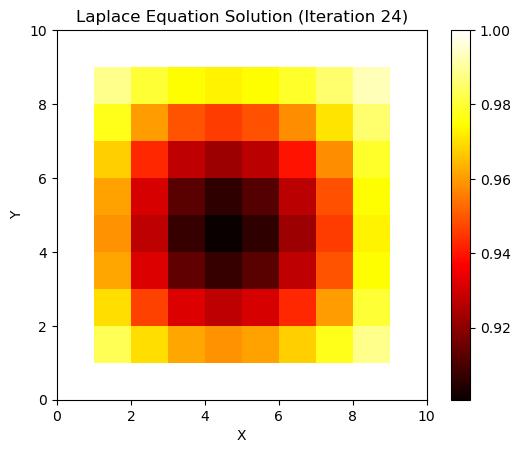

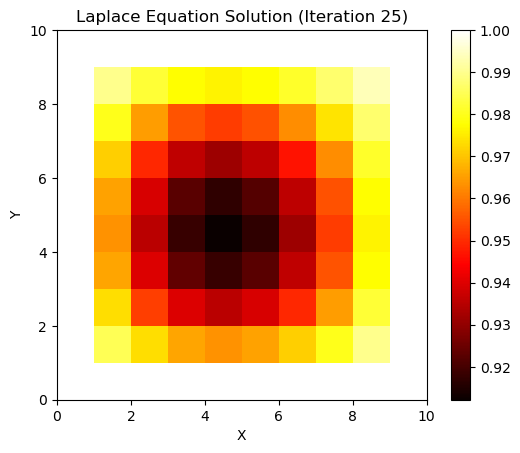

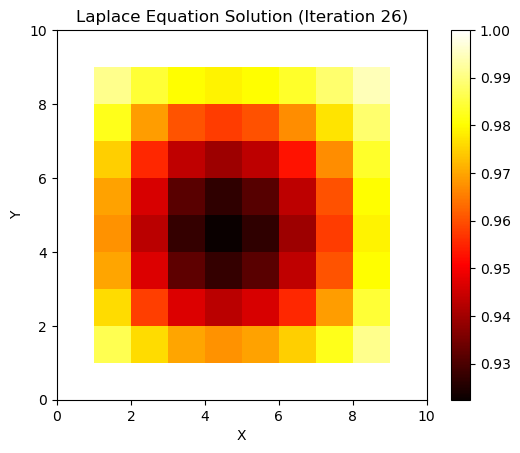

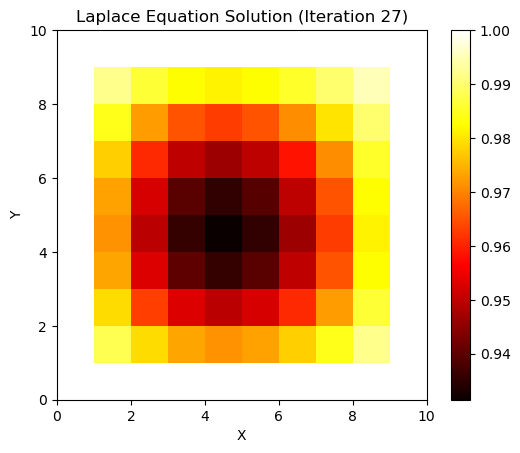

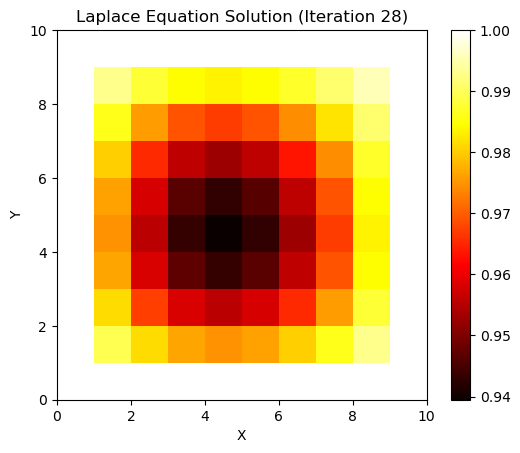

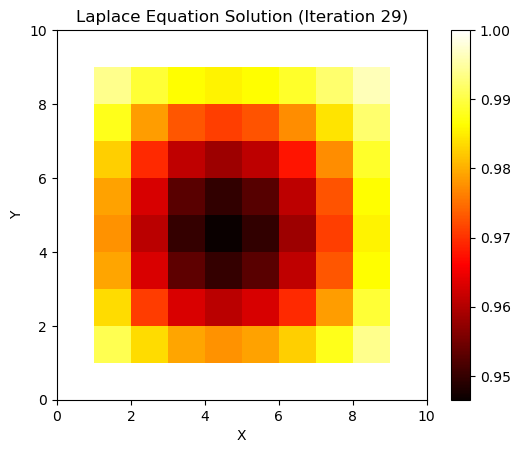

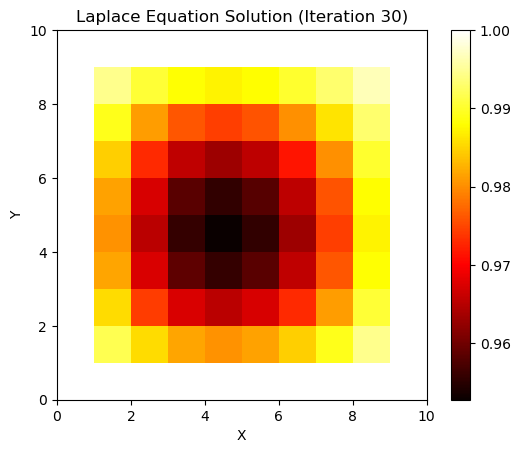

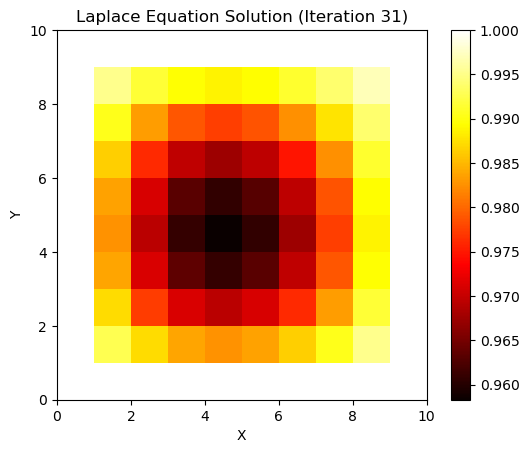

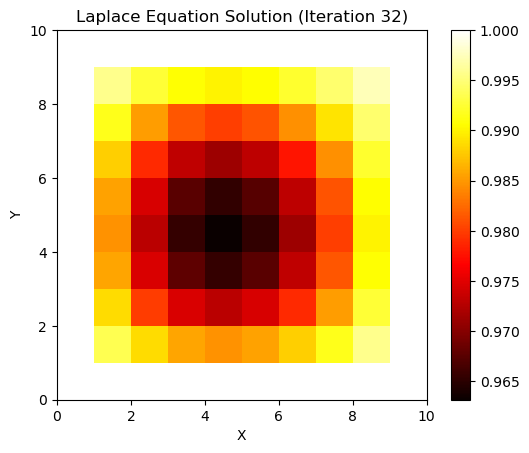

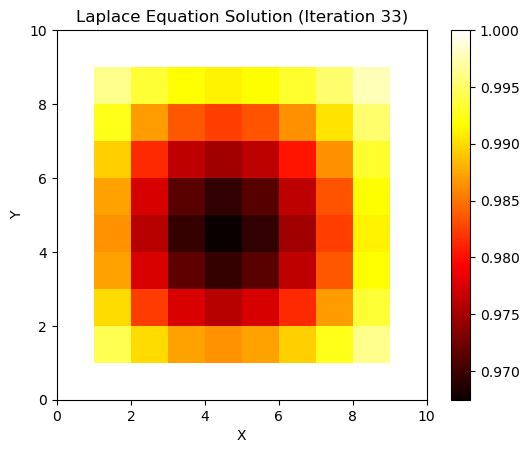

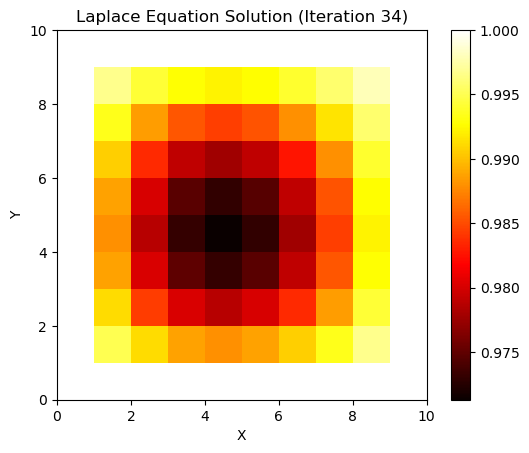

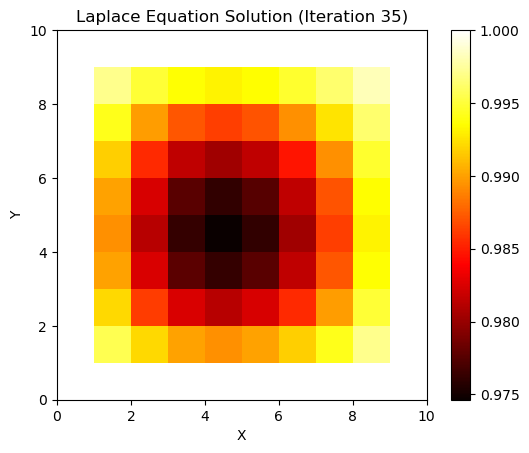

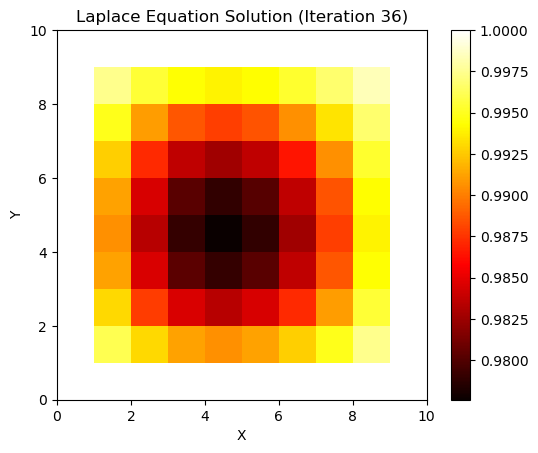

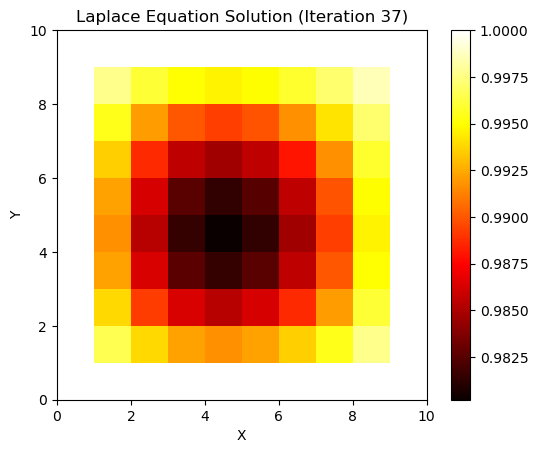

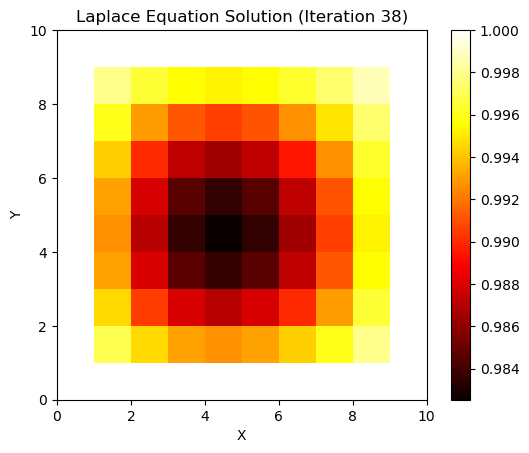

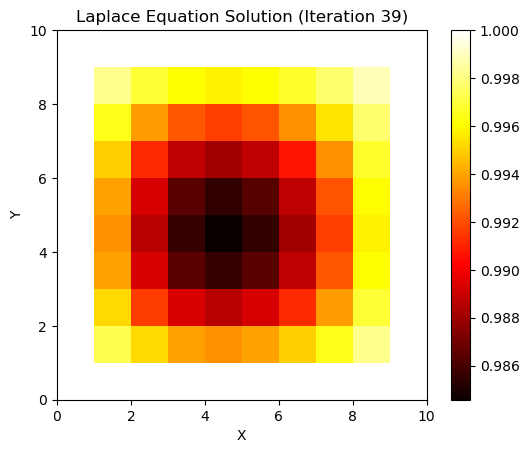

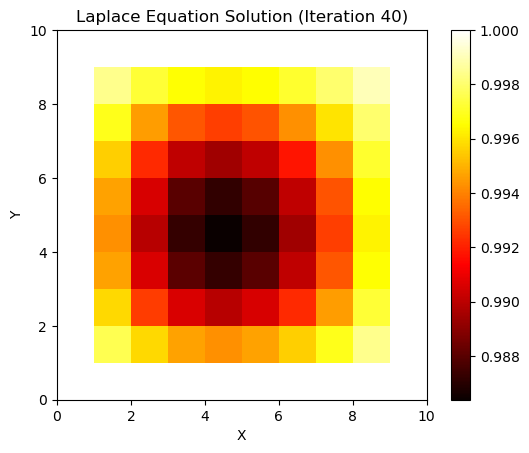

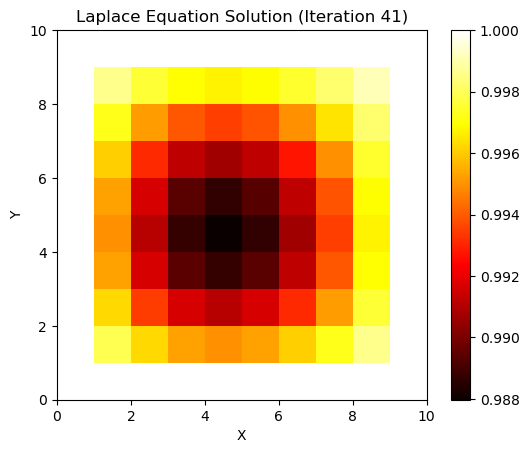

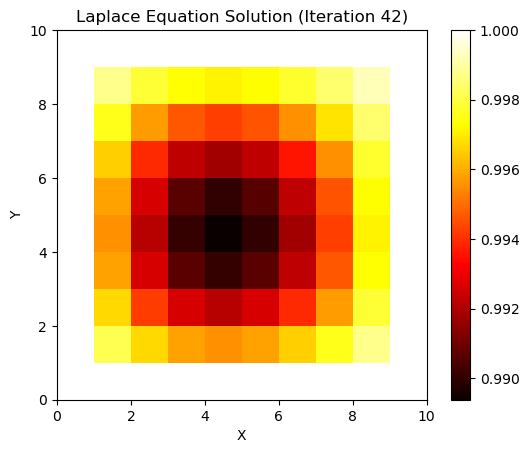

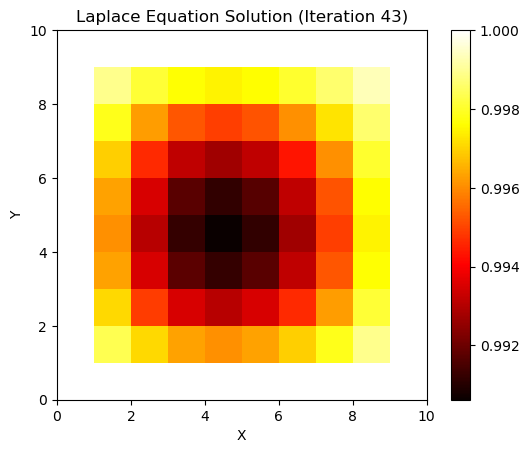

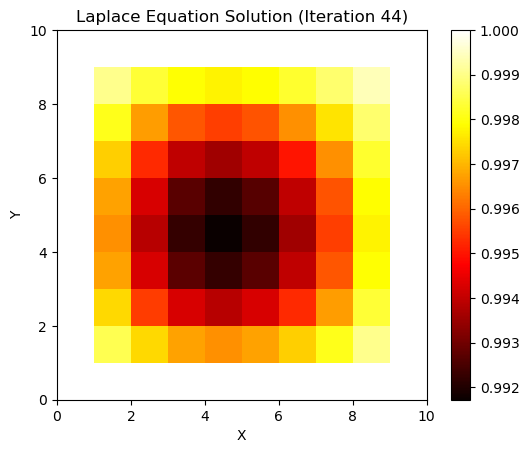

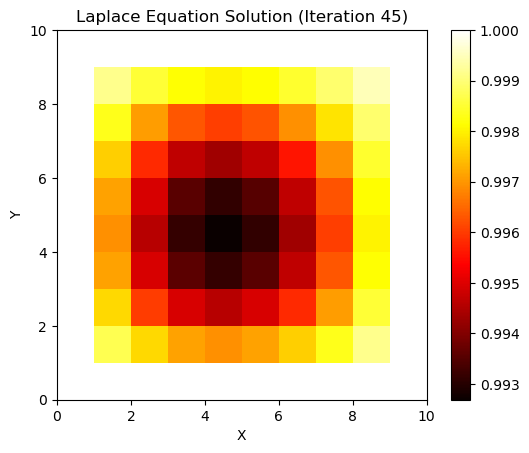

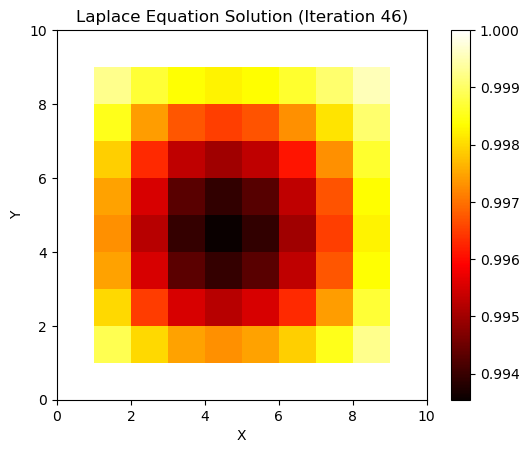

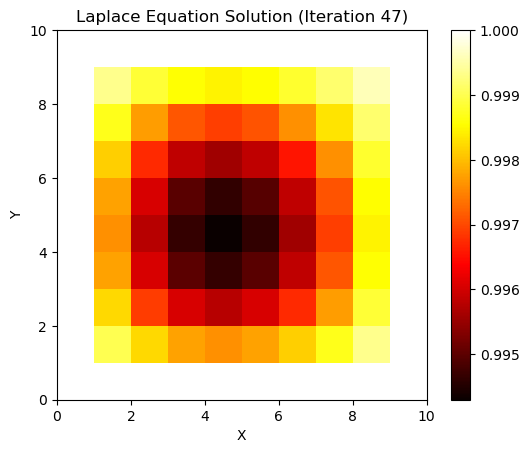

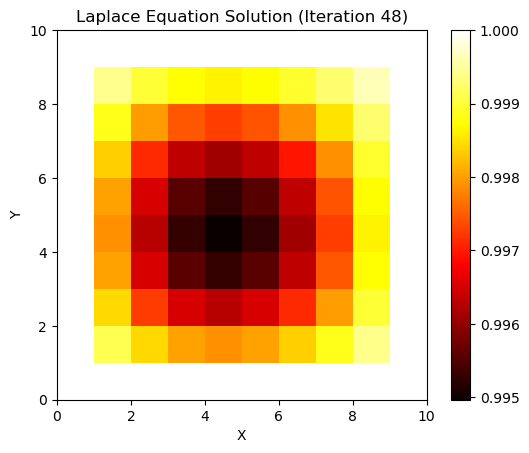

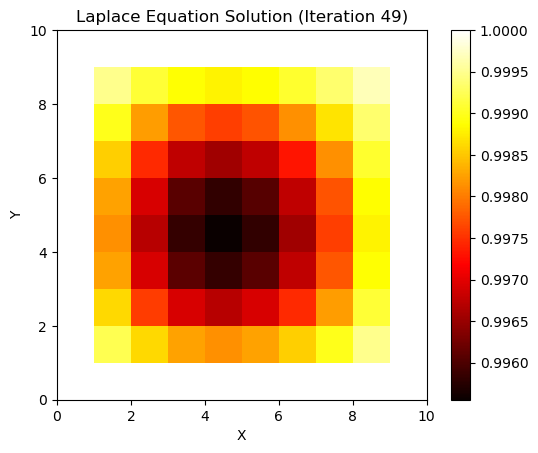

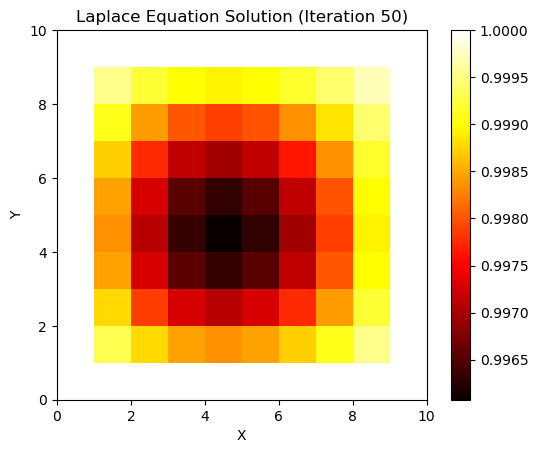

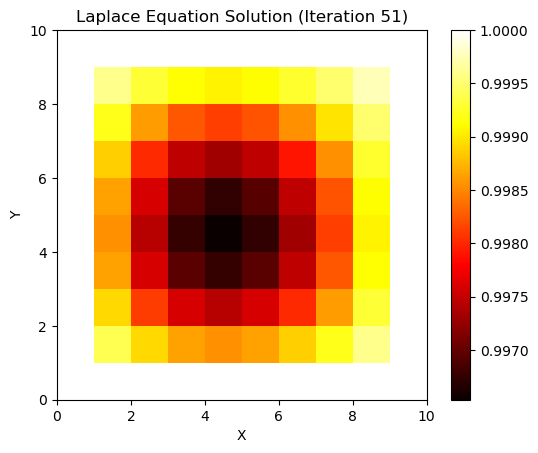

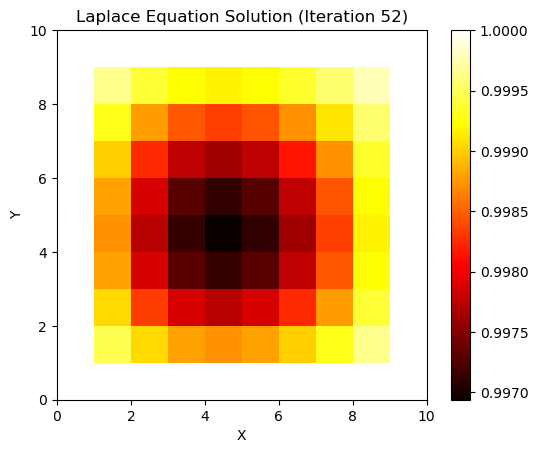

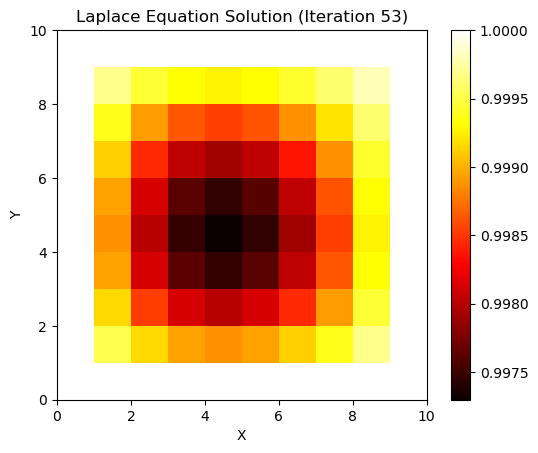

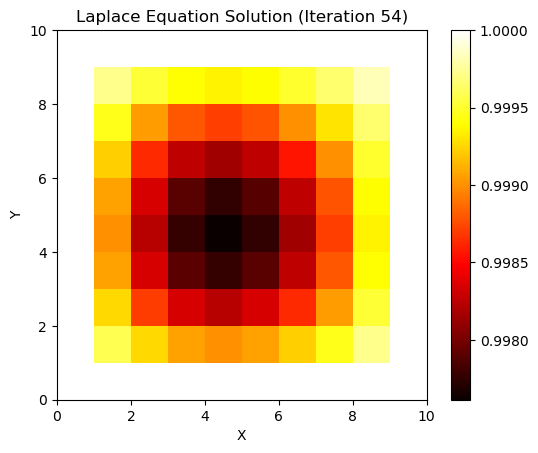

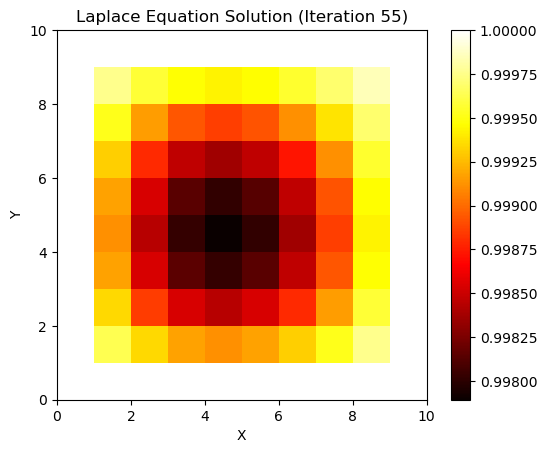

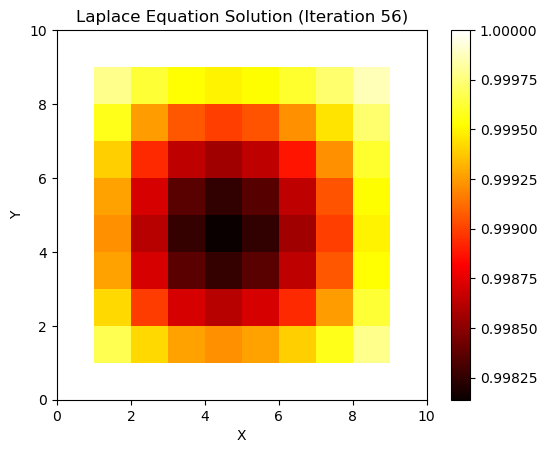

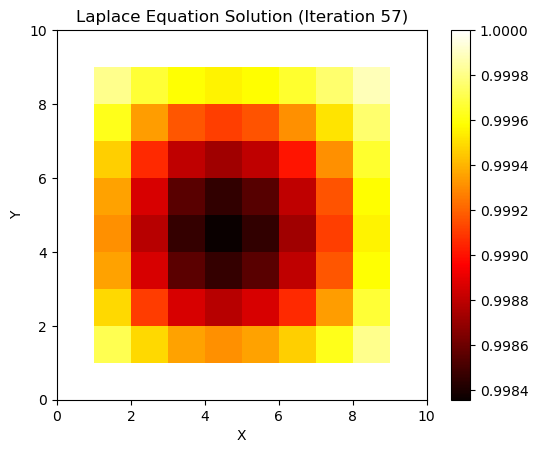

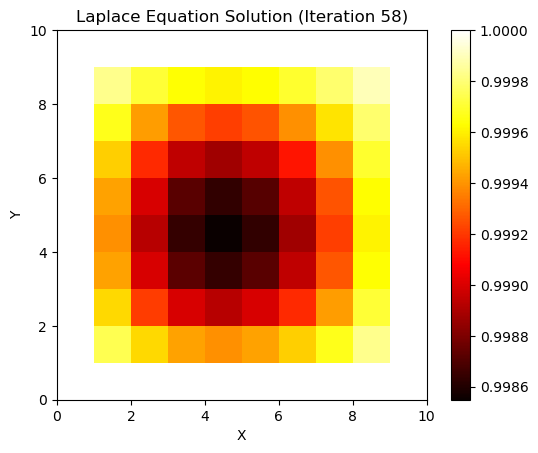

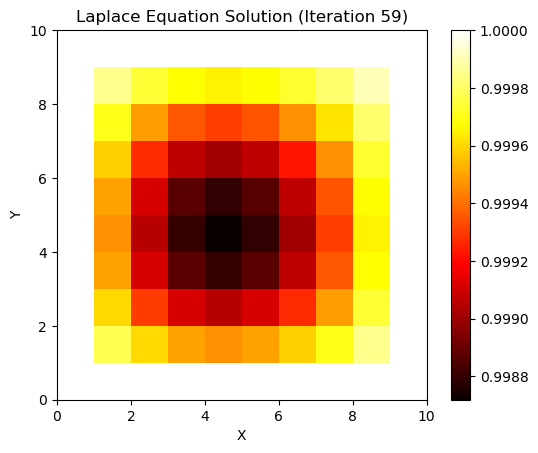

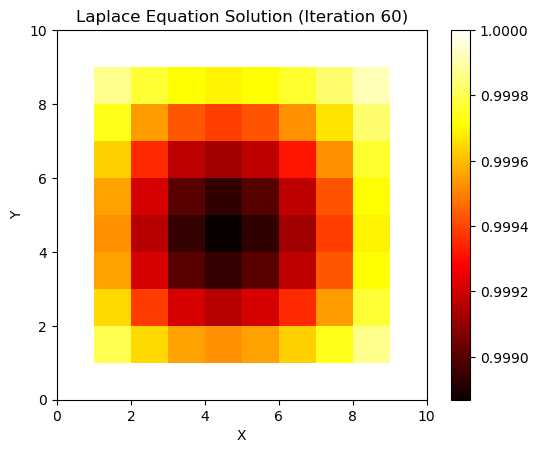

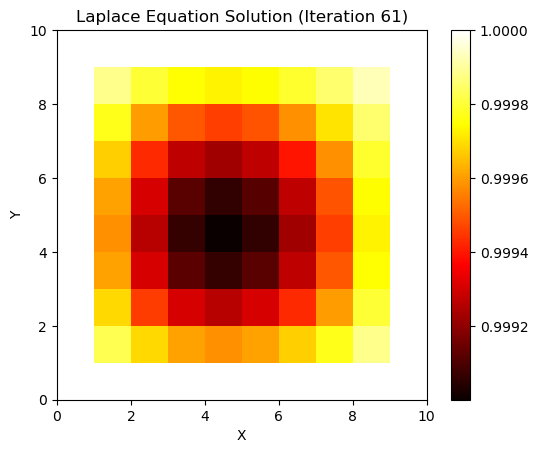

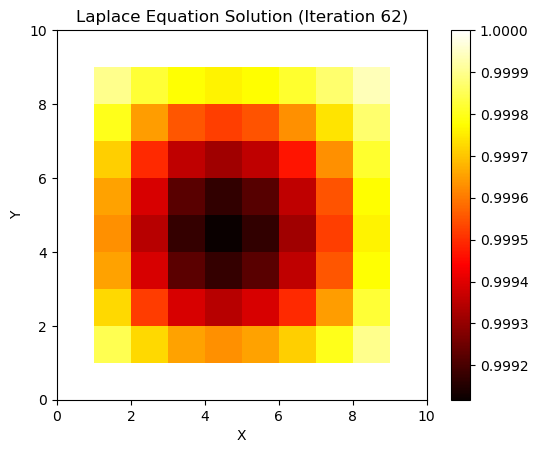

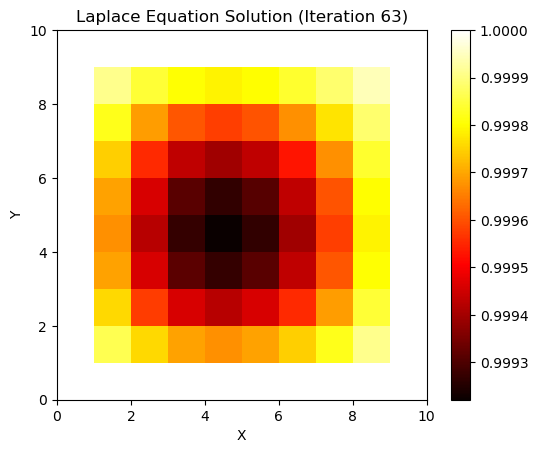

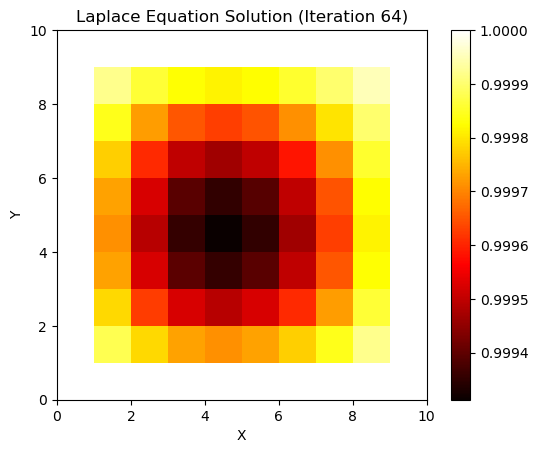

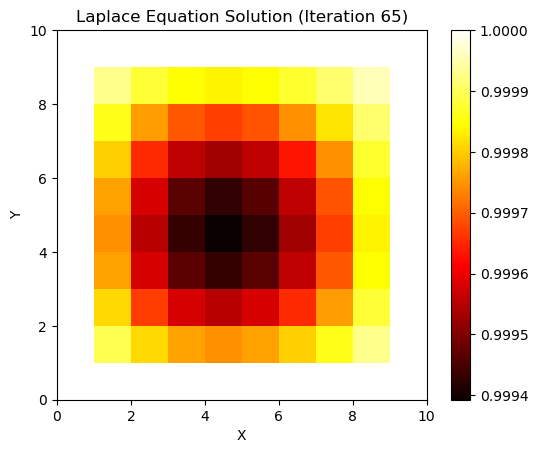

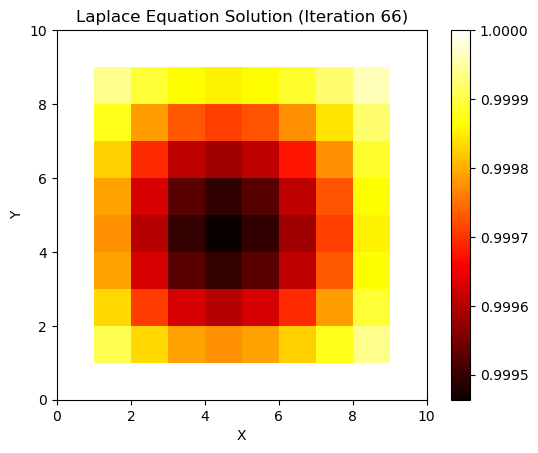

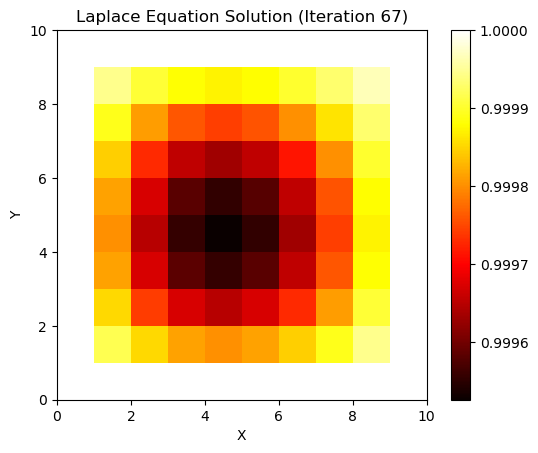

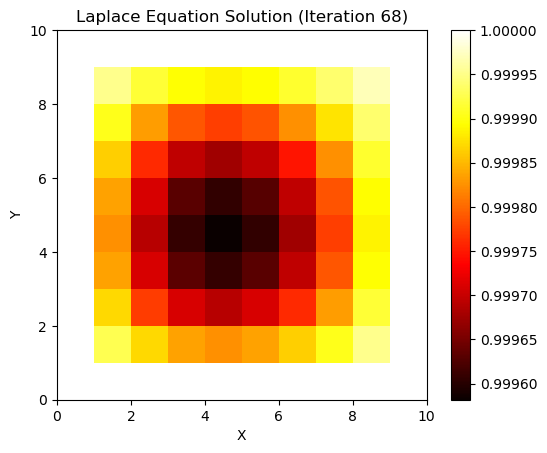

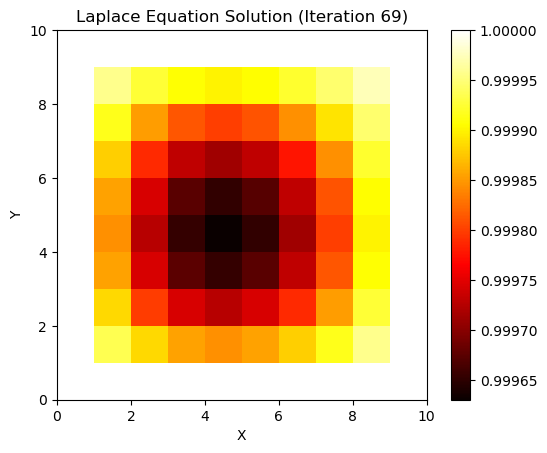

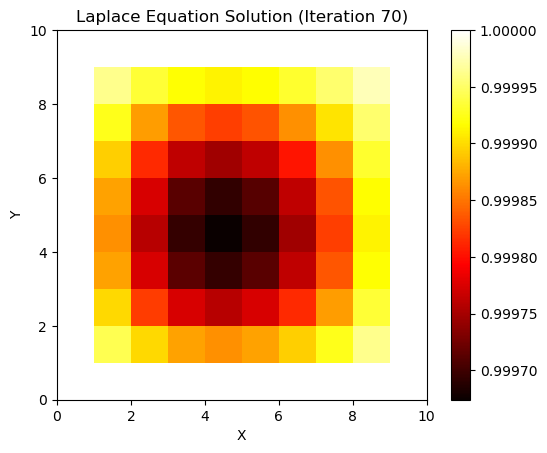

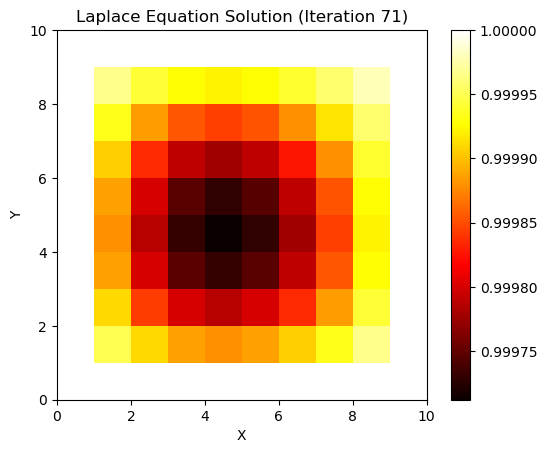

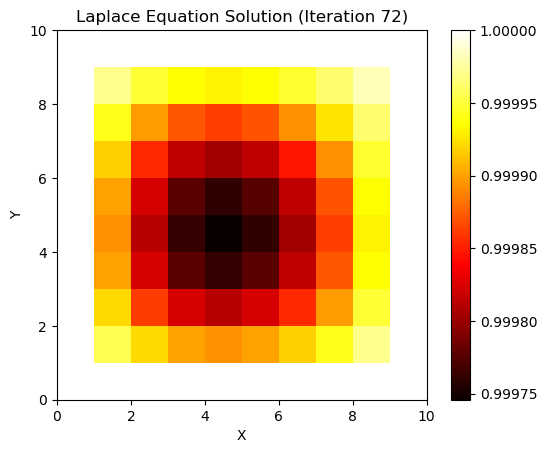

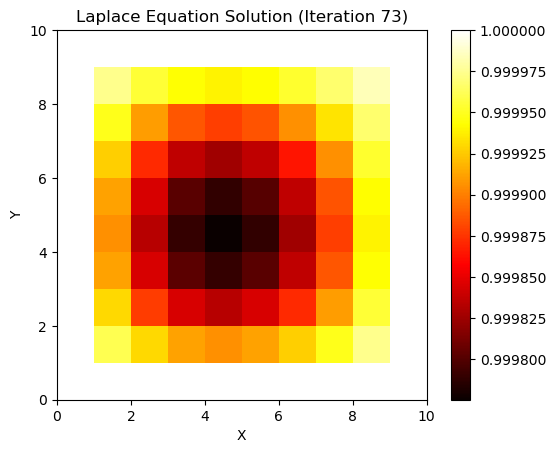

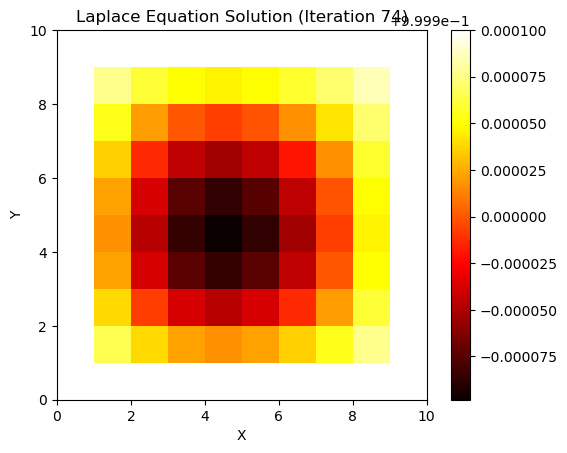

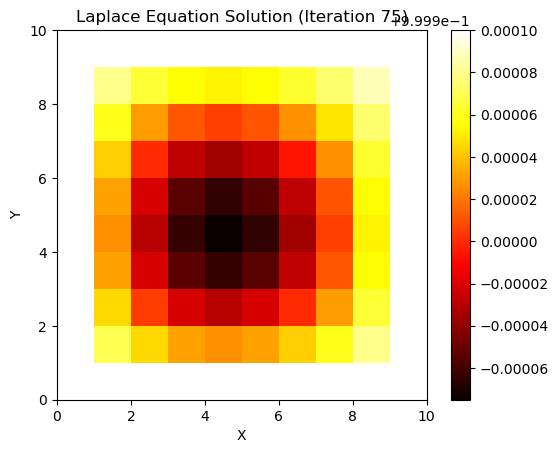

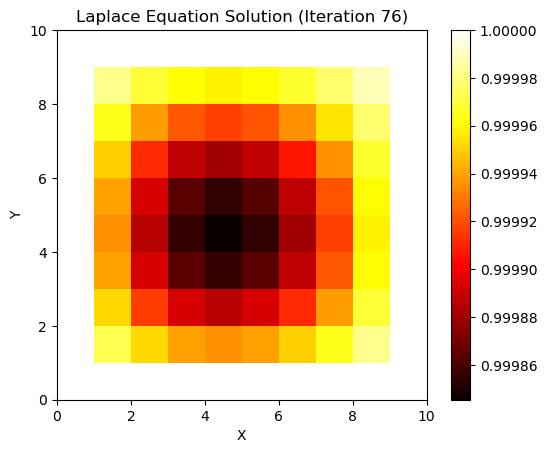

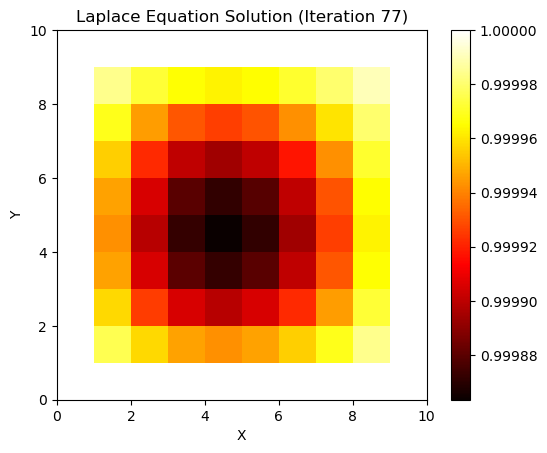

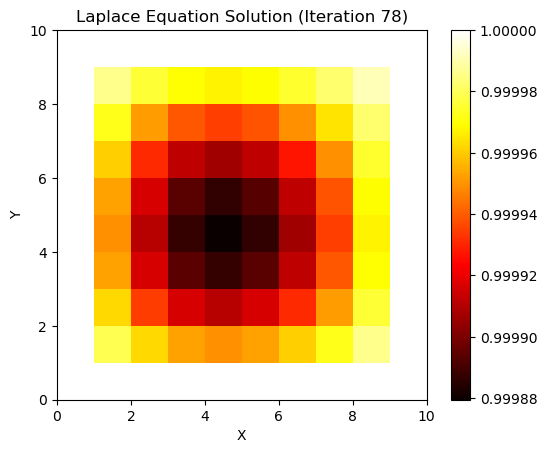

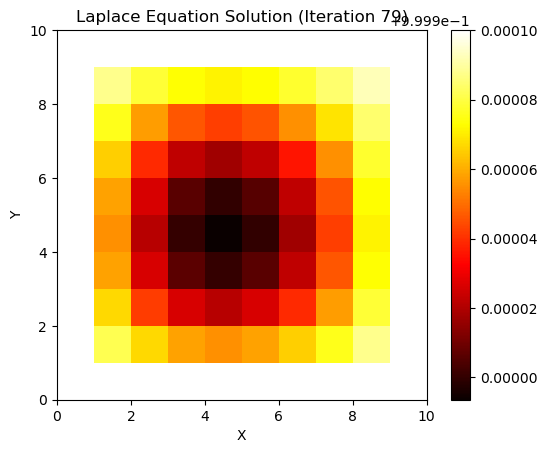

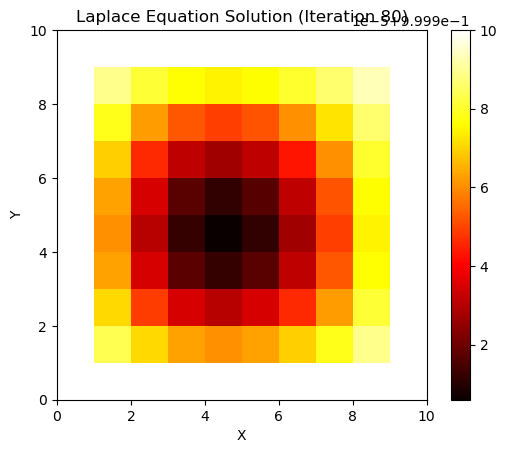

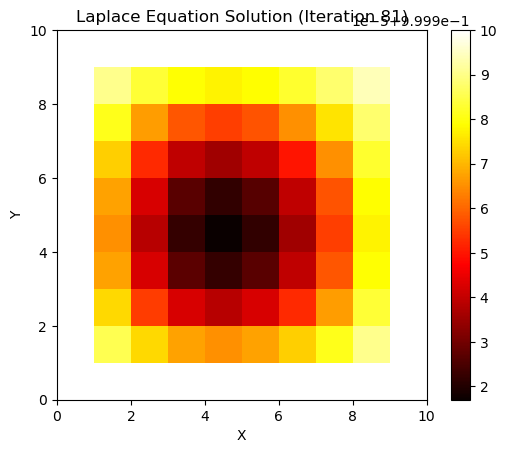

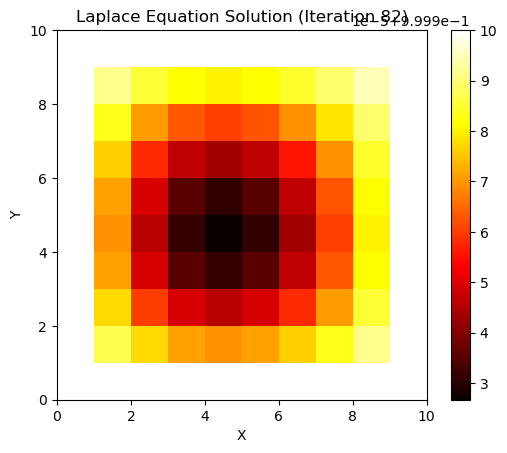

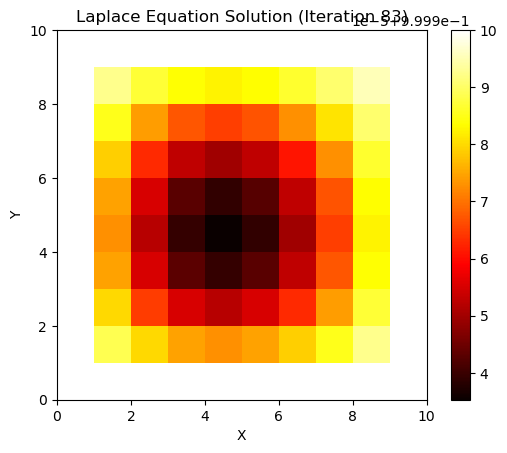

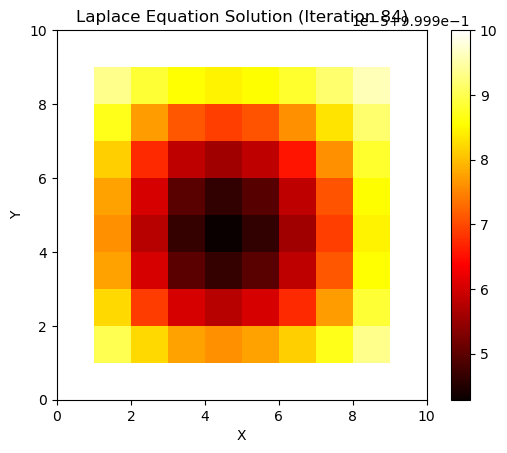

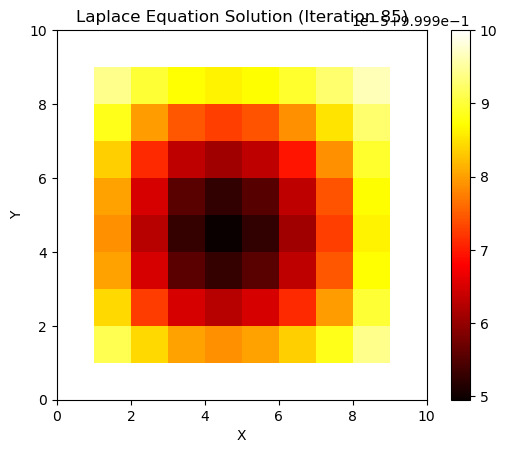

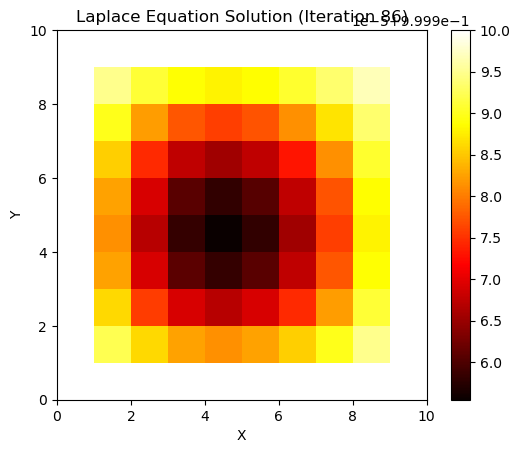

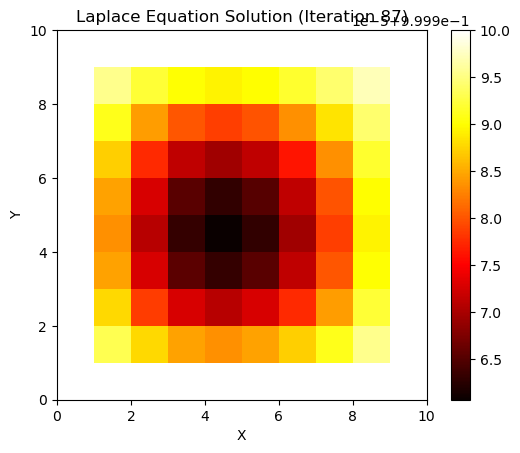

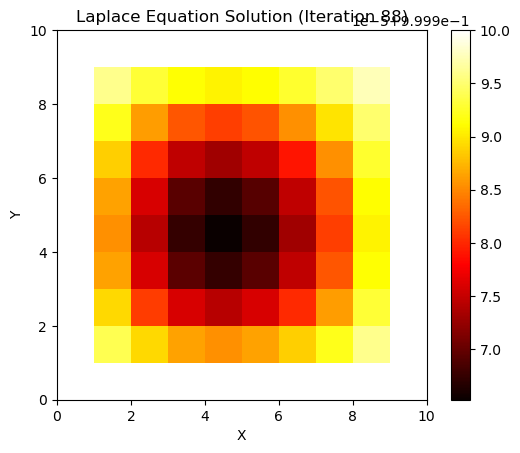

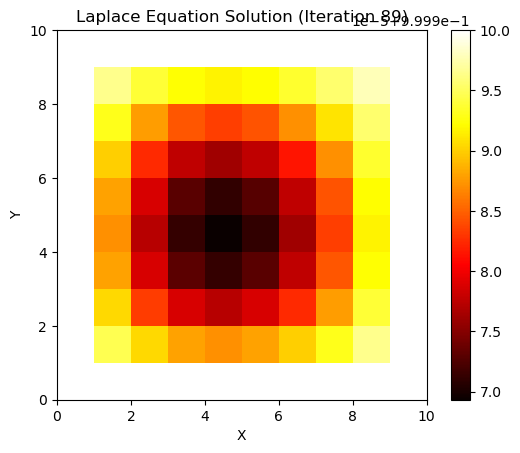

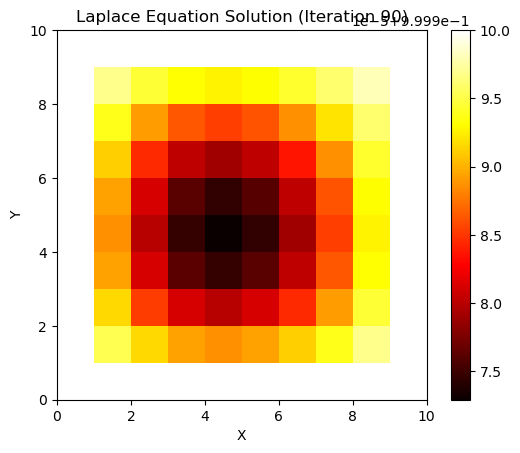

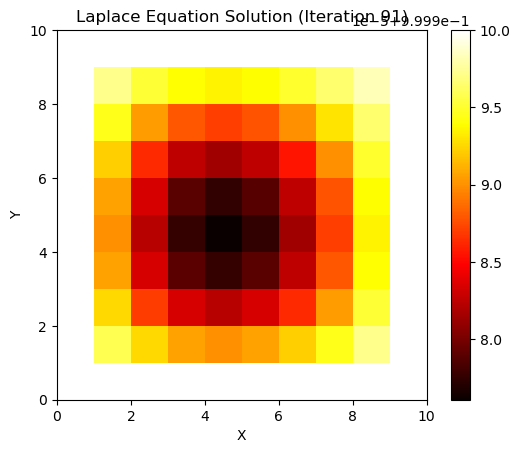

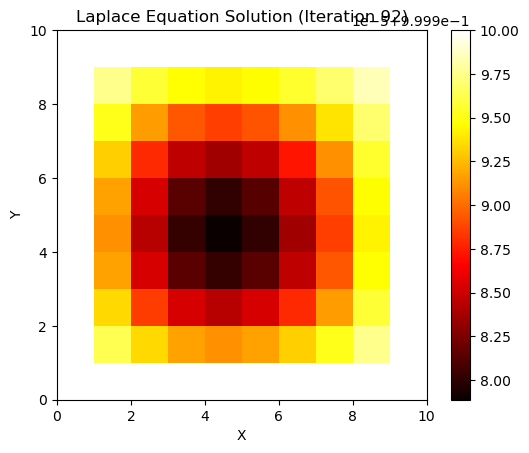

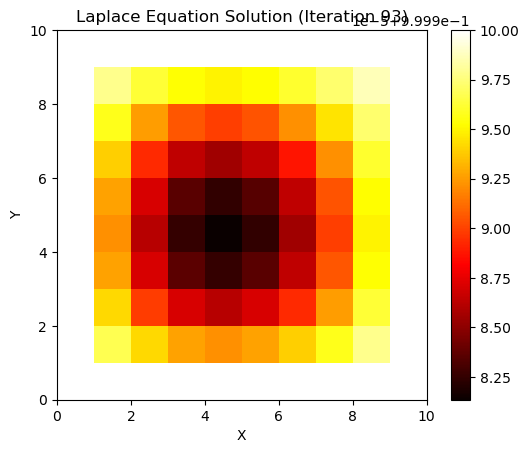

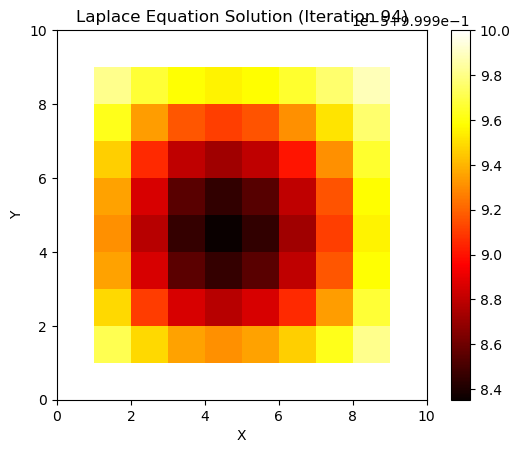

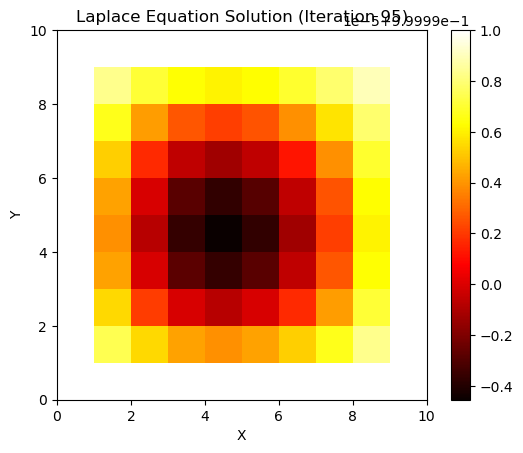

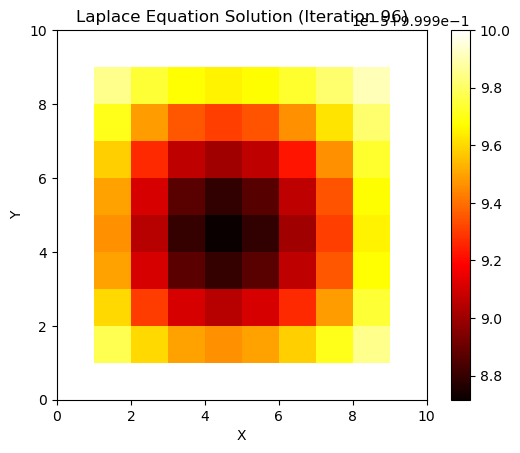

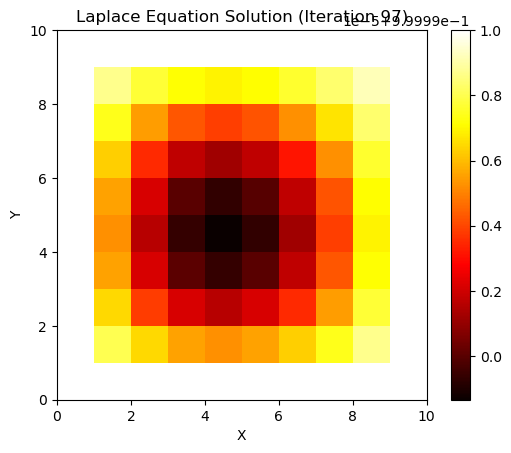

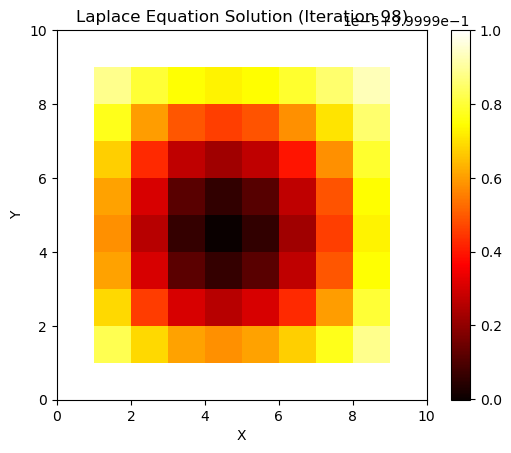

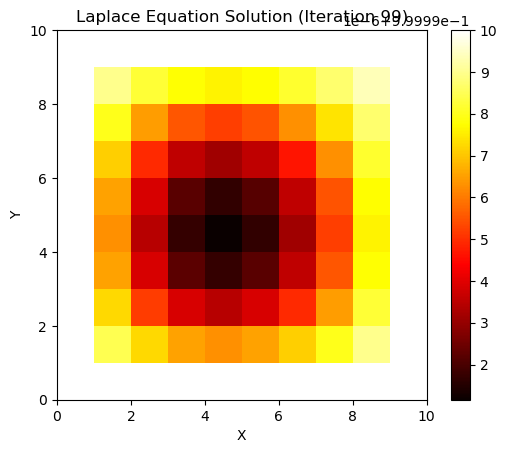

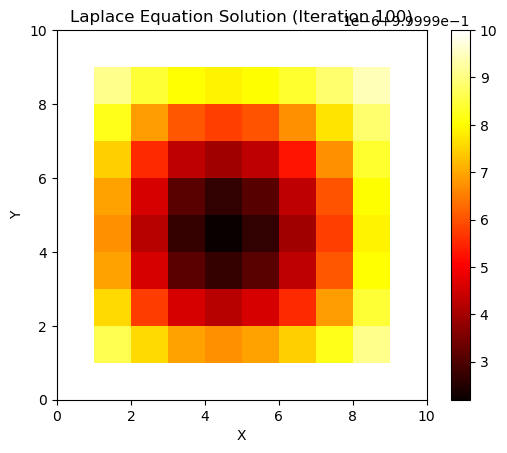

In [14]:
# THIS CODE HERE IS THE SAME AS THE FIRST ONE, BUT YOU CAN SEE IN A GRAPH HOW AT EACH STEP THE CODE CONVERGES TOWARDS A SOLUTION.

import numpy as np
import matplotlib.pyplot as plt

def solve_laplace_equation(n, max_iterations, tolerance):
    # Create the initial grid with zeros
    grid = np.zeros((n, n))

    # Set the boundary conditions
    grid[0, :] = 1  # Top boundary
    grid[-1, :] = 1  # Bottom boundary
    grid[:, 0] = 1  # Left boundary
    grid[:, -1] = 1  # Right boundary

    # Store the intermediate solutions
    solutions = [grid.copy()]

    # Perform Gauss-Seidel iterations
    for iteration in range(max_iterations):
        prev_grid = np.copy(grid)
        max_diff = 0.0

        # Update the interior points using neighboring values
        for i in range(1, n - 1):
            for j in range(1, n - 1):
                grid[i, j] = 0.25 * (grid[i-1, j] + prev_grid[i+1, j] + 1*(grid[i, j-1] + prev_grid[i, j+1]))

                # Calculate the maximum difference for convergence check
                diff = abs(grid[i, j] - prev_grid[i, j])
                if diff > max_diff:
                    max_diff = diff

        # Check for convergence
        if max_diff < tolerance:
            break

        # Store the current solution
        solutions.append(grid.copy())

    return solutions


# Set the parameters
n = 10  # Grid size
max_iterations = 1000  # Maximum number of iterations
tolerance = 1e-6  # Convergence tolerance

# Solve the Laplace equation
solutions = solve_laplace_equation(n, max_iterations, tolerance)

# Plot the solutions over time
for i, solution in enumerate(solutions):
    plt.imshow(solution, cmap='hot', origin='lower', extent=[0, n, 0, n])
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Laplace Equation Solution (Iteration {i+1})')
    plt.show()